# Arithmetic Operations on Images
Goal

Learn several arithmetic operations on images, like addition, subtraction, bitwise operations, and etc.

Learn these functions: cv2.add(), cv2.addWeighted(), etc.

学习很多图像的数学操作，就像相加、相减、元素端的操作等，学习函数：cv2.add(),cv2.addWeighted().

## Image Addition
图像相加。你可以使用cv2.add(img1,img2)来实现两幅图像的相加，或者直接使用res=img1+img2。两个图像需要有同样的深度和类型，或者第二个图像仅是标量。

In [14]:
import cv2
import numpy as np

img1 = cv2.imread("demo.png",cv2.IMREAD_COLOR)
img2 = cv2.imread("demo2.png",cv2.IMREAD_COLOR)
print(img1.shape,img2.shape)
img2 = cv2.resize(img2,(img1.shape[1],img1.shape[0]))
print(img1.shape,img2.shape)

# 两种加法都是对应元素相加，但是计算逻辑有所不同
add_1 = cv2.add(img1,img2)    # cv2.add()方法对元素进行对应相加，对超过255的值一律取255
add_2 = img1 + img2    # 直接相加（若超过上限，np.unint8的上限为255，则重新计数，如260->4）

np.all(add_1 == add_2)

# 理论上add_1中的255要多于add_2
print(np.count_nonzero(add_1 == 255))
print(np.count_nonzero(add_2 == 255))

(144, 156, 3) (144, 118, 3)
(144, 156, 3) (144, 156, 3)
38374
194


## Image Blending
图像混合。与图像相加类似，但对图像赋予不同的权重，以产生混合或透明的感觉。图像的添加遵循以下公式。

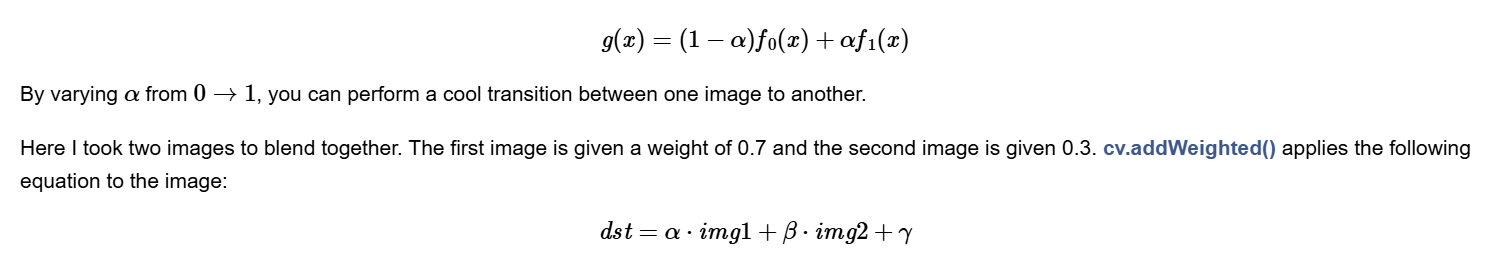

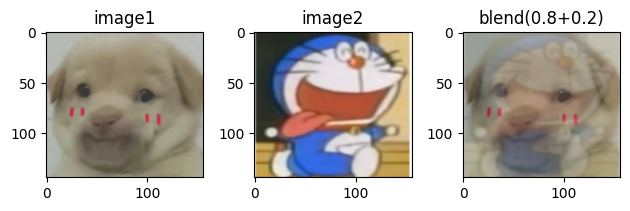

In [29]:
# 学习使用 cv.addWeighted()
# 参数：图像一、图像一的权重、图像二、图像二的权重，加上的残差。
blend_img = cv2.addWeighted(img1,0.8,img2,0.2,0)

# 匿名函数（转换通道）
cvt_img = lambda img : cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# map映射
blend_img,img1,img2 = map(cvt_img,[blend_img,img1,img2])

import matplotlib.pyplot as plt
plt.subplot(131),plt.imshow(img1),plt.title("image1")
plt.subplot(132),plt.imshow(img2),plt.title("image2")
plt.subplot(133),plt.imshow(blend_img),plt.title("blend(0.8+0.2)")
plt.tight_layout()
plt.show()

## Bitwise Operations
位置（元素）端的操作。

This includes the bitwise AND, OR, NOT, and XOR operations. They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI's, and etc. Below we will see an example of how to change a particular region of an image.（这包括按位与、按位或、按位非和异或操作。在提取图像的任何部分时，这些操作会非常有用（正如我们在后面的章节中将看到的），在定义和处理非矩形ROI时等。下面我们将看到一个如何改变图像特定区域的例子。）

目标，将一些不规则的目标（如一个logo）放入另一张图像当中。如果采用上述方法，可能会导致图像颜色改变或者有透明效果。如果目标是规则的矩形，则可以使用上节的ROI进行添加，但是多数不是规则图形则不可行。预期得到以下效果。
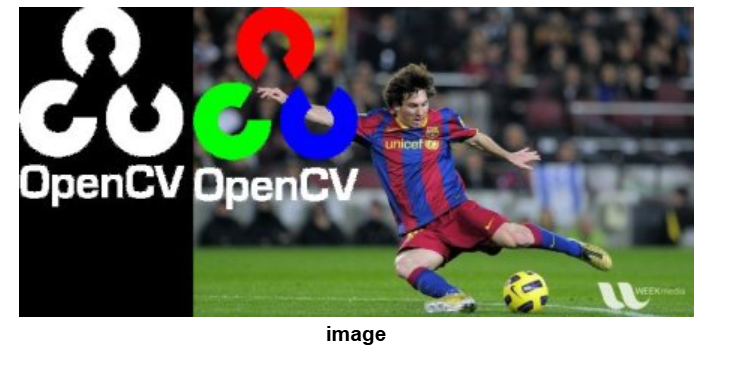

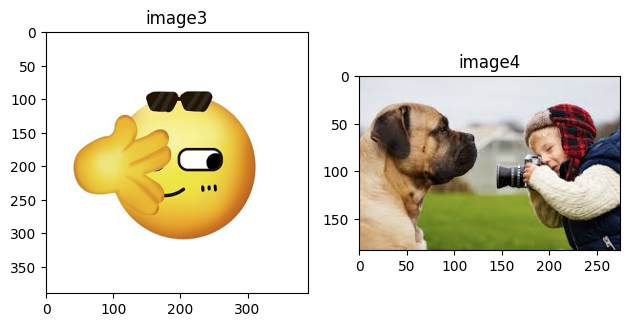

In [30]:
img3 = cv2.imread("demo3.jpg",cv2.IMREAD_COLOR)
img4 = cv2.imread("demo4.jpg",cv2.IMREAD_COLOR)
img3,img4 = map(cvt_img,[img3,img4])

plt.subplot(121),plt.imshow(img3),plt.title("image3")
plt.subplot(122),plt.imshow(img4),plt.title("image4")
plt.tight_layout()
plt.show()

1379 3621 5000 5000
250.0


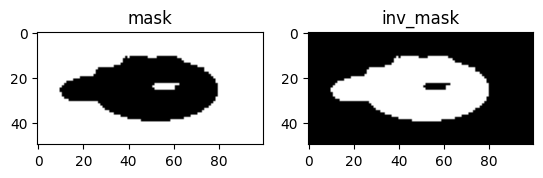

In [58]:
# 为了方便，调整一下image3的尺寸
img3 = cv2.resize(img3,(100,50))

# 我想把表情放在图4的中下部分，获得ROI
row,col,channels = img3.shape
roi = img4[-20-row:-20,100:100+col]

# 创建掩码，并创建它的反掩码
img3_gray = cv2.cvtColor(img3,cv2.COLOR_RGB2GRAY)  # 此处的图片已经是转换过颜色通道的，为RGB通道顺序
ret,mask = cv2.threshold(img3_gray,250,255,cv2.THRESH_BINARY)
# cv2.threshold()，参数如下：
# img2gray：输入的灰度图像。
# 10：设置的阈值，所有像素值小于这个值的像素将被设为 0。
# 255：对于所有像素值大于或等于阈值的像素，将被设为 255。（也即小于10为0也就是黑色，大于10为255也就是白色）
# cv.THRESH_BINARY：指定使用的阈值类型，这里表示使用二值化处理。

# 提升对cv2.threshold的理解，现在图像中只有0或255，所以0和255的个数加起来应该等于总个数
black_count = np.count_nonzero(mask == 0)
white_count = np.count_nonzero(mask == 255)
print(black_count,white_count,black_count+white_count,img3_gray.size)

# 返回值ret为阈值，mask为返回的二值图像（阈值选择依据情况而定）
print(ret)

# 对一个mask图像进行反位操作
mask_inv = cv2.bitwise_not(mask)

plt.subplot(121),plt.imshow(mask,'gray'),plt.title("mask")
plt.subplot(122),plt.imshow(mask_inv,'gray'),plt.title("inv_mask")
plt.show()

(50, 100, 3) (50, 100, 3)


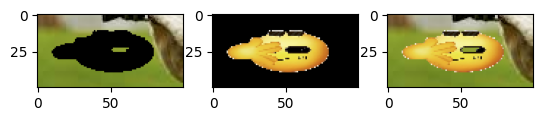

In [60]:
# 抠图，在roi上扣除对应位置的图像
img4_background = cv2.bitwise_and(roi,roi,mask=mask) # 对原图像，保留白色（255）区域，提出黑色（0）的区域。

# 取图
fg = cv2.bitwise_and(img3,img3,mask=mask_inv)

# 合并
dst = cv2.add(img4_background,fg)

print(img4_background.shape,fg.shape)
plt.subplot(131),plt.imshow(img4_background)
plt.subplot(132),plt.imshow(fg)
plt.subplot(133),plt.imshow(dst)
plt.show()

In [66]:
# 合并
img4_res = img4[:,:,:]
img4_res[-20-row:-20,100:100+col] = dst
img4_res = cv2.cvtColor(img4_res,cv2.COLOR_BGR2RGB)
cv2.imshow("res",img4_res)
cv2.waitKey(0)

-1

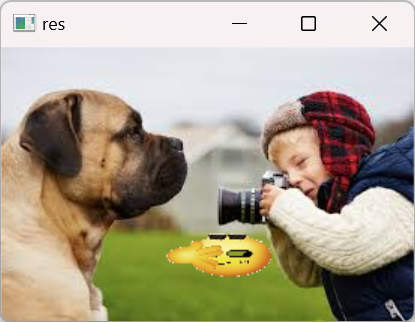